<a href="https://colab.research.google.com/github/ariffinsarhid/Capstone/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Cleaning
In this notebook, I will do some data cleaning which includes the following:
- I will import the dataset and clean the data.
- I will convert the names in lowercase.
- Replace any spaces with an underscore. 
- Deal with missing data. 

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = 'ignore')
import io

In [37]:
url = 'https://raw.githubusercontent.com/ariffinsarhid/Capstone/main/final_table.csv'
df = pd.read_csv(url, index_col='FlightDate')

In [38]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
FlightDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11/06/19,2019,2,6,11,2,9E,20363,9E,3459,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10868,1086803,30868,CAE,"Columbia, SC",SC,South Carolina,37,1950,2331.0,221.0,221.0,1.0,12.0,19.0,2350.0,25.0,6.0,2057,31.0,214.0,214.0,1.0,12.0,2000-2059,67.0,60.0,35.0,1,192,1,0.0,0.0,0.0,0.0,214.0
08/02/18,2018,1,2,8,4,WN,19393,WN,5932,13232,1323202,30977,MDW,"Chicago, IL",IL,17,Illinois,41,11259,1125903,30194,DAL,"Dallas, TX",TX,Texas,74,2030,2046.0,16.0,16.0,1.0,1.0,34.0,2120.0,2314.0,5.0,2250,2319.0,29.0,29.0,1.0,1.0,2200-2259,140.0,153.0,114.0,1,793,4,0.0,0.0,13.0,0.0,16.0
24/03/20,2020,1,3,24,2,YV,20378,YV,5825,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81,12954,1295407,32575,LGB,"Long Beach, CA",CA,California,91,1858,1950.0,52.0,52.0,1.0,3.0,9.0,1959.0,2101.0,4.0,2021,2105.0,44.0,44.0,1.0,2.0,2000-2059,83.0,75.0,62.0,1,355,2,44.0,0.0,0.0,0.0,0.0
02/09/19,2019,3,9,2,1,YX,20452,YX,6104,12451,1245102,31136,JAX,"Jacksonville, FL",FL,12,Florida,33,10721,1072102,30721,BOS,"Boston, MA",MA,Massachusetts,13,1204,1200.0,-4.0,0.0,0.0,-1.0,10.0,1210.0,1439.0,10.0,1452,1449.0,-3.0,0.0,0.0,-1.0,1400-1459,168.0,169.0,149.0,1,1010,5,NaN,NaN,NaN,NaN,NaN
27/03/19,2019,1,3,27,3,OH,20397,OH,5125,10990,1099005,30990,CHO,"Charlottesville, VA",VA,51,Virginia,38,11057,1105703,31057,CLT,"Charlotte, NC",NC,North Carolina,36,1605,1605.0,0.0,0.0,0.0,0.0,21.0,1626.0,1718.0,4.0,1728,1722.0,-6.0,0.0,0.0,-1.0,1700-1759,83.0,77.0,52.0,1,245,1,NaN,NaN,NaN,NaN,NaN


In [39]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
FlightDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11/06/19,2019,2,6,11,2,9E,20363,9E,3459,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10868,1086803,30868,CAE,"Columbia, SC",SC,South Carolina,37,1950,2331.0,221.0,221.0,1.0,12.0,19.0,2350.0,25.0,6.0,2057,31.0,214.0,214.0,1.0,12.0,2000-2059,67.0,60.0,35.0,1,192,1,0.0,0.0,0.0,0.0,214.0
08/02/18,2018,1,2,8,4,WN,19393,WN,5932,13232,1323202,30977,MDW,"Chicago, IL",IL,17,Illinois,41,11259,1125903,30194,DAL,"Dallas, TX",TX,Texas,74,2030,2046.0,16.0,16.0,1.0,1.0,34.0,2120.0,2314.0,5.0,2250,2319.0,29.0,29.0,1.0,1.0,2200-2259,140.0,153.0,114.0,1,793,4,0.0,0.0,13.0,0.0,16.0
24/03/20,2020,1,3,24,2,YV,20378,YV,5825,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81,12954,1295407,32575,LGB,"Long Beach, CA",CA,California,91,1858,1950.0,52.0,52.0,1.0,3.0,9.0,1959.0,2101.0,4.0,2021,2105.0,44.0,44.0,1.0,2.0,2000-2059,83.0,75.0,62.0,1,355,2,44.0,0.0,0.0,0.0,0.0
02/09/19,2019,3,9,2,1,YX,20452,YX,6104,12451,1245102,31136,JAX,"Jacksonville, FL",FL,12,Florida,33,10721,1072102,30721,BOS,"Boston, MA",MA,Massachusetts,13,1204,1200.0,-4.0,0.0,0.0,-1.0,10.0,1210.0,1439.0,10.0,1452,1449.0,-3.0,0.0,0.0,-1.0,1400-1459,168.0,169.0,149.0,1,1010,5,NaN,NaN,NaN,NaN,NaN
27/03/19,2019,1,3,27,3,OH,20397,OH,5125,10990,1099005,30990,CHO,"Charlottesville, VA",VA,51,Virginia,38,11057,1105703,31057,CLT,"Charlotte, NC",NC,North Carolina,36,1605,1605.0,0.0,0.0,0.0,0.0,21.0,1626.0,1718.0,4.0,1728,1722.0,-6.0,0.0,0.0,-1.0,1700-1759,83.0,77.0,52.0,1,245,1,NaN,NaN,NaN,NaN,NaN


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89009 entries, 11/06/19 to 05/03/19
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             89009 non-null  int64  
 1   Quarter                          89009 non-null  int64  
 2   Month                            89009 non-null  int64  
 3   DayofMonth                       89009 non-null  int64  
 4   DayOfWeek                        89009 non-null  int64  
 5   Reporting_Airline                89009 non-null  object 
 6   DOT_ID_Reporting_Airline         89009 non-null  int64  
 7   IATA_CODE_Reporting_Airline      89009 non-null  object 
 8   Flight_Number_Reporting_Airline  89009 non-null  int64  
 9   OriginAirportID                  89009 non-null  int64  
 10  OriginAirportSeqID               89009 non-null  int64  
 11  OriginCityMarketID               89009 non-null  int64  
 12  Origin       

In [41]:
df.shape ## The data has 169696 rows with 109 columns.

(89009, 54)

#### Clean the columns

In [42]:
def clean_column(df):
    df.columns = df.columns.str.replace(' ', '_')
    df.columns = df.columns.str.lower()
    
    return df

In [43]:
clean_column(df)

,year,quarter,month,dayofmonth,dayofweek,reporting_airline,dot_id_reporting_airline,iata_code_reporting_airline,flight_number_reporting_airline,originairportid,originairportseqid,origincitymarketid,origin,origincityname,originstate,originstatefips,originstatename,originwac,destairportid,destairportseqid,destcitymarketid,dest,destcityname,deststate,deststatename,destwac,crsdeptime,deptime,depdelay,depdelayminutes,depdel15,departuredelaygroups,taxiout,wheelsoff,wheelson,taxiin,crsarrtime,arrtime,arrdelay,arrdelayminutes,arrdel15,arrivaldelaygroups,arrtimeblk,crselapsedtime,actualelapsedtime,airtime,flights,distance,distancegroup,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
FlightDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11/06/19,2019,2,6,11,2,9E,20363,9E,3459,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10868,1086803,30868,CAE,"Columbia, SC",SC,South Carolina,37,1950,2331.0,221.0,221.0,1.0,12.0,19.0,2350.0,25.0,6.0,2057,31.0,214.0,214.0,1.0,12.0,2000-2059,67.0,60.0,35.0,1,192,1,0.0,0.0,0.0,0.0,214.0
08/02/18,2018,1,2,8,4,WN,19393,WN,5932,13232,1323202,30977,MDW,"Chicago, IL",IL,17,Illinois,41,11259,1125903,30194,DAL,"Dallas, TX",TX,Texas,74,2030,2046.0,16.0,16.0,1.0,1.0,34.0,2120.0,2314.0,5.0,2250,2319.0,29.0,29.0,1.0,1.0,2200-2259,140.0,153.0,114.0,1,793,4,0.0,0.0,13.0,0.0,16.0
24/03/20,2020,1,3,24,2,YV,20378,YV,5825,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81,12954,1295407,32575,LGB,"Long Beach, CA",CA,California,91,1858,1950.0,52.0,52.0,1.0,3.0,9.0,1959.0,2101.0,4.0,2021,2105.0,44.0,44.0,1.0,2.0,2000-2059,83.0,75.0,62.0,1,355,2,44.0,0.0,0.0,0.0,0.0
02/09/19,2019,3,9,2,1,YX,20452,YX,6104,12451,1245102,31136,JAX,"Jacksonville, FL",FL,12,Florida,33,10721,1072102,30721,BOS,"Boston, MA",MA,Massachusetts,13,1204,1200.0,-4.0,0.0,0.0,-1.0,10.0,1210.0,1439.0,10.0,1452,1449.0,-3.0,0.0,0.0,-1.0,1400-1459,168.0,169.0,149.0,1,1010,5,NaN,NaN,NaN,NaN,NaN
27/03/19,2019,1,3,27,3,OH,20397,OH,5125,10990,1099005,30990,CHO,"Charlottesville, VA",VA,51,Virginia,38,11057,1105703,31057,CLT,"Charlotte, NC",NC,North Carolina,36,1605,1605.0,0.0,0.0,0.0,0.0,21.0,1626.0,1718.0,4.0,1728,1722.0,-6.0,0.0,0.0,-1.0,1700-1759,83.0,77.0,52.0,1,245,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15/08/18,2018,3,8,15,3,UA,19977,UA,996,11603,1160302,31603,EUG,"Eugene, OR",OR,41,Oregon,92,14771,1477104,32457,SFO,"San Francisco, CA",CA,California,91,535,556.0,21.0,21.0,1.0,1.0,11.0,607.0,727.0,3.0,706,730.0,24.0,24.0,1.0,1.0,0700-0759,91.0,94.0,80.0,1,451,2,0.0,0.0,24.0,0.0,0.0
10/07/19,2019,3,7,10,3,AA,19805,AA,2876,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,15412,1541205,35412,TYS,"Knoxville, TN",TN,Tennessee,54,1629,1624.0,-5.0,0.0,0.0,-1.0,23.0,1647.0,1718.0,5.0,1736,1723.0,-13.0,0.0,0.0,-1.0,1700-1759,67.0,59.0,31.0,1,177,1,NaN,NaN,NaN,NaN,NaN
07/04/18,2018,2,4,7,6,WN,19393,WN,6196,12191,1219102,31453,HOU,"Houston, TX",TX,48,Texas,74,15016,1501606,31123,STL,"St. Louis, MO",MO,Missouri,64,1700,1706.0,6.0,6.0,0.0,0.0,10.0,1716.0,1859.0,3.0,1855,1902.0,7.0,7.0,0.0,0.0,1800-1859,115.0,116.0,103.0,1,687,3,NaN,NaN,NaN,NaN,NaN


#### Checking for null values

Text(0.5, 1.0, 'Missing value in the dataset')

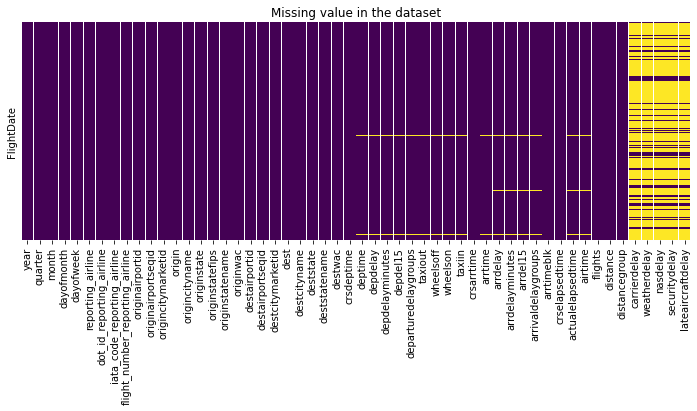

In [44]:
plt.figure(figsize = (12,4))
sns.heatmap(df.isnull(),cbar = False, cmap = 'viridis', yticklabels = False)
plt.title('Missing value in the dataset')

#### There seems to be a lot of missing values for columns 'carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay'. According to the data dictionary, these columns are in numerical which shows the cause of delay in minutes. Therefore, it make sense that there won't be any input in the column if the flight was on time. However, for the purpose of cleaning the data, i will input numerical zero if the flight is on time. 

In [45]:
pd.options.display.max_rows = 55
df.isnull().sum()

year                                   0
quarter                                0
month                                  0
dayofmonth                             0
dayofweek                              0
reporting_airline                      0
dot_id_reporting_airline               0
iata_code_reporting_airline            0
flight_number_reporting_airline        0
originairportid                        0
originairportseqid                     0
origincitymarketid                     0
origin                                 0
origincityname                         0
originstate                            0
originstatefips                        0
originstatename                        0
originwac                              0
destairportid                          0
destairportseqid                       0
destcitymarketid                       0
dest                                   0
destcityname                           0
deststate                              0
deststatename   

In [46]:
print("Percentage of null values in airtime:", ((2201/89009)*100))

Percentage of null values in airtime: 2.4727836510914627


#### Except for 'carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay', let's drop the missing rows

In [47]:
df.shape

(89009, 54)

In [48]:
df = df.dropna(subset= ['deptime', 'depdelay', 'depdelayminutes', 'depdel15',
                       'departuredelaygroups', 'taxiout', 'wheelsoff', 'wheelson', 'taxiin',
                       'arrtime','arrdelay', 'arrdelayminutes', 'arrdel15', 
                       'arrivaldelaygroups', 'crselapsedtime', 'actualelapsedtime', 'airtime'])

In [49]:
df.shape

(86761, 54)

In [50]:
df.isnull().sum()

year                                   0
quarter                                0
month                                  0
dayofmonth                             0
dayofweek                              0
reporting_airline                      0
dot_id_reporting_airline               0
iata_code_reporting_airline            0
flight_number_reporting_airline        0
originairportid                        0
originairportseqid                     0
origincitymarketid                     0
origin                                 0
origincityname                         0
originstate                            0
originstatefips                        0
originstatename                        0
originwac                              0
destairportid                          0
destairportseqid                       0
destcitymarketid                       0
dest                                   0
destcityname                           0
deststate                              0
deststatename   

#### Now let's deal with the remaining missing columns

In [51]:
df[df.arrdel15.isin([1])]

,year,quarter,month,dayofmonth,dayofweek,reporting_airline,dot_id_reporting_airline,iata_code_reporting_airline,flight_number_reporting_airline,originairportid,originairportseqid,origincitymarketid,origin,origincityname,originstate,originstatefips,originstatename,originwac,destairportid,destairportseqid,destcitymarketid,dest,destcityname,deststate,deststatename,destwac,crsdeptime,deptime,depdelay,depdelayminutes,depdel15,departuredelaygroups,taxiout,wheelsoff,wheelson,taxiin,crsarrtime,arrtime,arrdelay,arrdelayminutes,arrdel15,arrivaldelaygroups,arrtimeblk,crselapsedtime,actualelapsedtime,airtime,flights,distance,distancegroup,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
FlightDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11/06/19,2019,2,6,11,2,9E,20363,9E,3459,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10868,1086803,30868,CAE,"Columbia, SC",SC,South Carolina,37,1950,2331.0,221.0,221.0,1.0,12.0,19.0,2350.0,25.0,6.0,2057,31.0,214.0,214.0,1.0,12.0,2000-2059,67.0,60.0,35.0,1,192,1,0.0,0.0,0.0,0.0,214.0
08/02/18,2018,1,2,8,4,WN,19393,WN,5932,13232,1323202,30977,MDW,"Chicago, IL",IL,17,Illinois,41,11259,1125903,30194,DAL,"Dallas, TX",TX,Texas,74,2030,2046.0,16.0,16.0,1.0,1.0,34.0,2120.0,2314.0,5.0,2250,2319.0,29.0,29.0,1.0,1.0,2200-2259,140.0,153.0,114.0,1,793,4,0.0,0.0,13.0,0.0,16.0
24/03/20,2020,1,3,24,2,YV,20378,YV,5825,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81,12954,1295407,32575,LGB,"Long Beach, CA",CA,California,91,1858,1950.0,52.0,52.0,1.0,3.0,9.0,1959.0,2101.0,4.0,2021,2105.0,44.0,44.0,1.0,2.0,2000-2059,83.0,75.0,62.0,1,355,2,44.0,0.0,0.0,0.0,0.0
29/02/20,2020,1,2,29,6,WN,19393,WN,2699,13204,1320402,31454,MCO,"Orlando, FL",FL,12,Florida,33,13342,1334207,33342,MKE,"Milwaukee, WI",WI,Wisconsin,45,1750,1802.0,12.0,12.0,0.0,0.0,13.0,1815.0,1955.0,5.0,1945,2000.0,15.0,15.0,1.0,1.0,1900-1959,175.0,178.0,160.0,1,1066,5,12.0,0.0,3.0,0.0,0.0
27/09/18,2018,3,9,27,4,UA,19977,UA,1414,13256,1325602,33256,MFE,"Mission/McAllen/Edinburg, TX",TX,48,Texas,74,12266,1226603,31453,IAH,"Houston, TX",TX,Texas,74,730,801.0,31.0,31.0,1.0,2.0,9.0,810.0,900.0,3.0,841,903.0,22.0,22.0,1.0,1.0,0800-0859,71.0,62.0,50.0,1,316,2,22.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
06/09/18,2018,3,9,6,4,DL,19790,DL,2807,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,11433,1143302,31295,DTW,"Detroit, MI",MI,Michigan,43,1655,1654.0,-1.0,0.0,0.0,-1.0,148.0,1922.0,2038.0,6.0,1857,2044.0,107.0,107.0,1.0,7.0,1800-1859,122.0,230.0,76.0,1,502,3,0.0,0.0,107.0,0.0,0.0
02/07/18,2018,3,7,2,1,YV,20378,YV,6110,12264,1226402,30852,IAD,"Washington, DC",VA,51,Virginia,38,14122,1412202,30198,PIT,"Pittsburgh, PA",PA,Pennsylvania,23,845,921.0,36.0,36.0,1.0,2.0,14.0,935.0,1006.0,5.0,943,1011.0,28.0,28.0,1.0,1.0,0900-0959,58.0,50.0,31.0,1,182,1,28.0,0.0,0.0,0.0,0.0
18/04/19,2019,2,4,18,4,AA,19805,AA,2426,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11996,1199603,31871,GSP,"Greer, SC",SC,South Carolina,37,1850,1848.0,-2.0,0.0,0.0,-1.0,24.0,1912.0,2232.0,6.0,2203,2238.0,35.0,35.0,1.0,2.0,2200-2259,133.0,170.0,140.0,1,862,4,0.0,0.0,35.0,0.0,0.0


In [52]:
df.fillna(0, inplace = True)

In [53]:
df.head()

,year,quarter,month,dayofmonth,dayofweek,reporting_airline,dot_id_reporting_airline,iata_code_reporting_airline,flight_number_reporting_airline,originairportid,originairportseqid,origincitymarketid,origin,origincityname,originstate,originstatefips,originstatename,originwac,destairportid,destairportseqid,destcitymarketid,dest,destcityname,deststate,deststatename,destwac,crsdeptime,deptime,depdelay,depdelayminutes,depdel15,departuredelaygroups,taxiout,wheelsoff,wheelson,taxiin,crsarrtime,arrtime,arrdelay,arrdelayminutes,arrdel15,arrivaldelaygroups,arrtimeblk,crselapsedtime,actualelapsedtime,airtime,flights,distance,distancegroup,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
FlightDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11/06/19,2019,2,6,11,2,9E,20363,9E,3459,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10868,1086803,30868,CAE,"Columbia, SC",SC,South Carolina,37,1950,2331.0,221.0,221.0,1.0,12.0,19.0,2350.0,25.0,6.0,2057,31.0,214.0,214.0,1.0,12.0,2000-2059,67.0,60.0,35.0,1,192,1,0.0,0.0,0.0,0.0,214.0
08/02/18,2018,1,2,8,4,WN,19393,WN,5932,13232,1323202,30977,MDW,"Chicago, IL",IL,17,Illinois,41,11259,1125903,30194,DAL,"Dallas, TX",TX,Texas,74,2030,2046.0,16.0,16.0,1.0,1.0,34.0,2120.0,2314.0,5.0,2250,2319.0,29.0,29.0,1.0,1.0,2200-2259,140.0,153.0,114.0,1,793,4,0.0,0.0,13.0,0.0,16.0
24/03/20,2020,1,3,24,2,YV,20378,YV,5825,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81,12954,1295407,32575,LGB,"Long Beach, CA",CA,California,91,1858,1950.0,52.0,52.0,1.0,3.0,9.0,1959.0,2101.0,4.0,2021,2105.0,44.0,44.0,1.0,2.0,2000-2059,83.0,75.0,62.0,1,355,2,44.0,0.0,0.0,0.0,0.0
02/09/19,2019,3,9,2,1,YX,20452,YX,6104,12451,1245102,31136,JAX,"Jacksonville, FL",FL,12,Florida,33,10721,1072102,30721,BOS,"Boston, MA",MA,Massachusetts,13,1204,1200.0,-4.0,0.0,0.0,-1.0,10.0,1210.0,1439.0,10.0,1452,1449.0,-3.0,0.0,0.0,-1.0,1400-1459,168.0,169.0,149.0,1,1010,5,0.0,0.0,0.0,0.0,0.0
27/03/19,2019,1,3,27,3,OH,20397,OH,5125,10990,1099005,30990,CHO,"Charlottesville, VA",VA,51,Virginia,38,11057,1105703,31057,CLT,"Charlotte, NC",NC,North Carolina,36,1605,1605.0,0.0,0.0,0.0,0.0,21.0,1626.0,1718.0,4.0,1728,1722.0,-6.0,0.0,0.0,-1.0,1700-1759,83.0,77.0,52.0,1,245,1,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Missing value in the dataset')

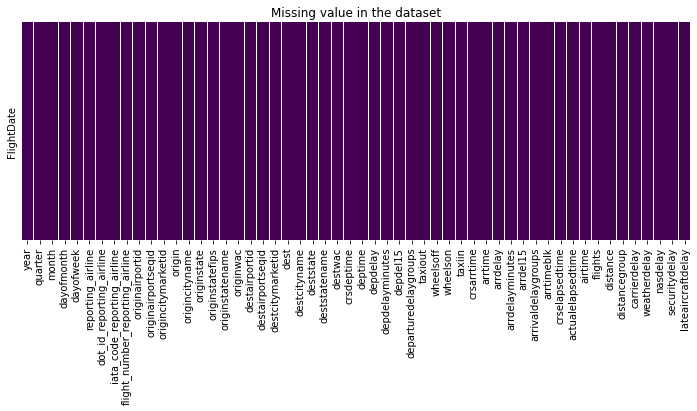

In [54]:
plt.figure(figsize = (12,4))
sns.heatmap(df.isnull(),cbar = False, cmap = 'viridis', yticklabels = False)
plt.title('Missing value in the dataset')

In [55]:
df.dtypes

year                                 int64
quarter                              int64
month                                int64
dayofmonth                           int64
dayofweek                            int64
reporting_airline                   object
dot_id_reporting_airline             int64
iata_code_reporting_airline         object
flight_number_reporting_airline      int64
originairportid                      int64
originairportseqid                   int64
origincitymarketid                   int64
origin                              object
origincityname                      object
originstate                         object
originstatefips                      int64
originstatename                     object
originwac                            int64
destairportid                        int64
destairportseqid                     int64
destcitymarketid                     int64
dest                                object
destcityname                        object
deststate  

## Feature Engineering
### 

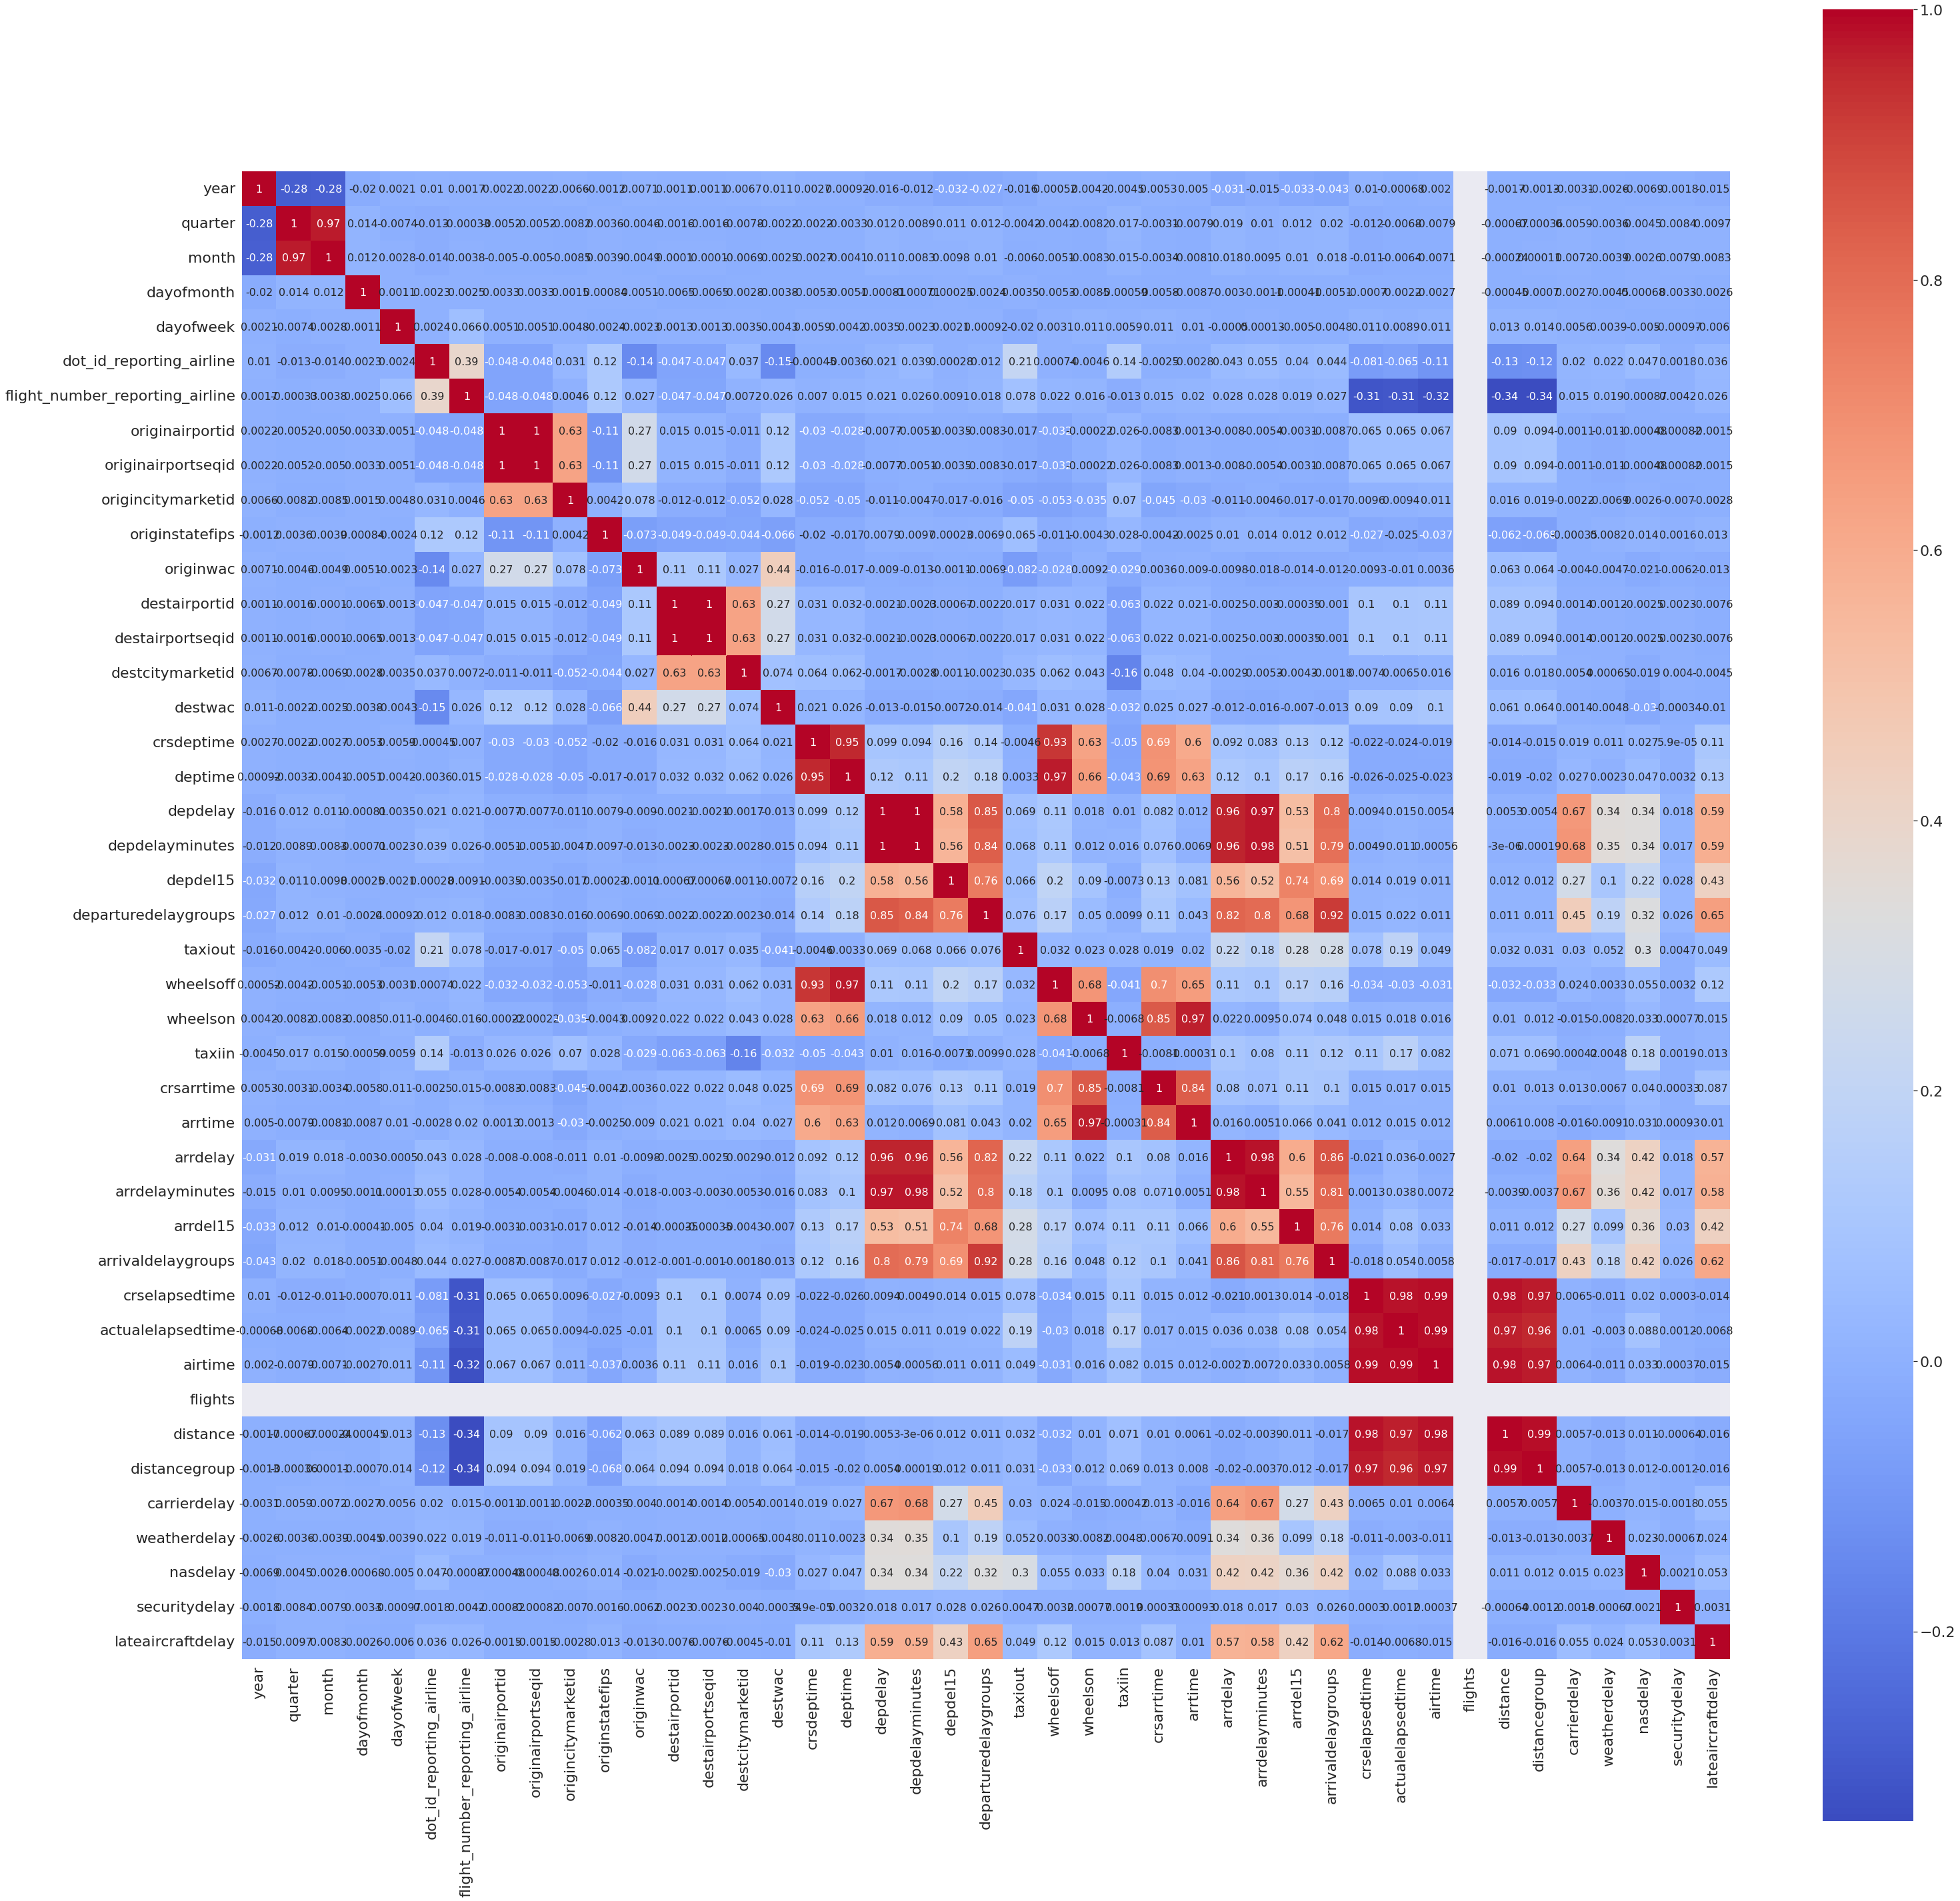

In [70]:
plt.figure(figsize = (50,50,))
sns.set(font_scale = 2)
sns.heatmap(df.corr(), square = True, annot = True, cmap ='coolwarm',annot_kws={"size": 16})